# Script for Running MK Modelling from Library

## Imports

In [1]:
import sys
sys.path.append("../py_src")

from glob import glob
import os

import numpy as np
import matplotlib.pyplot as plt

from mk_modelling import MkModeller

from string import ascii_uppercase # for labeling

## Defining k values and Constants

In [2]:
k_vals = np.array([
    [3.26452E+12, 199785919.2], # k_1b, k_1f
    [4.86739E+11, 62601834.14], # k_2b, k_2f
    [1811852049, 2213762.06],
    [924305626.2, 1.52517E+11],
    [165931341.8, 2882131943],
    [28022726176, 3.26452E+12],
    [3.26452E+12, 34532370389],
    [3.26452E+12, 40624056265] # k_8b, k_8f
])

constants = np.array([
    0.014,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    0.00,
    np.nan,
    0.07
])

cap_letters = list(ascii_uppercase)[:9]

k_cap = 1.96e15
assert np.sum(k_vals > k_cap) == 0, "ONE OF YOUR K VALUES IS TOO LARGE RHYS."
# k_vals[k_vals > 1.96e13] = k_cap

## Defining timesteps and MK Modeller

In [3]:
n_timesteps = 10000
mk_modeller = MkModeller()

mk_modeller.k[...] = k_vals
mk_modeller.y_mask[:] = constants

## Running and Plotting

/usr/local/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


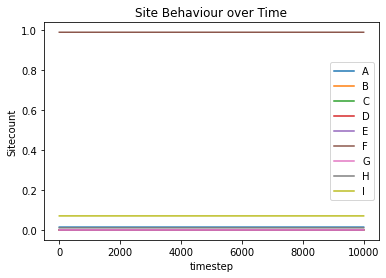

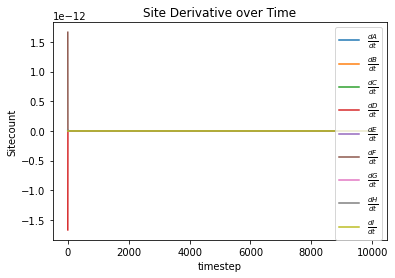

In [4]:
sol = mk_modeller.solve(n_timesteps, max_step=1e-12, rtol=1e-9)

final_values = sol[-1, :]
der = sol[1:, :] - sol[:-1, :]

plt.title("Site Behaviour over Time")
plt.plot(sol)
plt.ylabel("Sitecount")
plt.xlabel("timestep")
plt.legend(cap_letters)

plt.show()


plt.title("Site Derivative over Time")
plt.plot(der)
plt.ylabel("Sitecount")
plt.xlabel("timestep")
ders = [r"$\frac{d%s}{dt}$"%letter for letter in cap_letters]
plt.legend(ders)

plt.show()

In [5]:
print('Final Values')
for ii_let, letter in enumerate(cap_letters):
    print(letter+": %e"%final_values[ii_let])

print(1. - np.sum(final_values[1:6] - final_values[7]))

print(final_values[4])

print(mk_modeller.k[5, 1])

print("RES: %e"%((final_values[4] * mk_modeller.k[5, 1])) + "\n")

Final Values
A: 1.400000e-02
B: 1.591355e-09
C: 1.558516e-13
D: 7.507907e-13
E: 7.941518e-15
F: 9.876947e-01
G: 0.000000e+00
H: 1.044792e-02
I: 7.000000e-02
0.06454487126077668
7.94151759889158e-15
3264520000000.0
RES: 2.592524e-02



## Run Through Excel File

In [6]:
import openpyxl
import sqlalchemy

excel_path = os.path.expanduser('/Users/rhysbunting/Documents/felixprocess/rhcor.xlsx')

wb = openpyxl.load_workbook(filename=excel_path, data_only=True)

temperatures = [400, 500, 600]

start_cell = np.asarray([33, 2], dtype=np.int32)

In [7]:
for sheet in wb.worksheets:
    print("Sheet: "+sheet.title)
    for ii_temp, temp in enumerate(temperatures):
        base_cell = start_cell + np.array([0, 4*ii_temp], dtype=np.int32)
        for ii_k in range(8):
            mk_modeller.k[ii_k, 0] = sheet.cell(
                row=base_cell[0]+ii_k,
                column=base_cell[1]+1
            ).value
            mk_modeller.k[ii_k, 1] = sheet.cell(
                row=base_cell[0]+ii_k,
                column=base_cell[1]
            ).value

        sol = mk_modeller.solve(n_timesteps, max_step=1e-9, rtol=1e-15)

        final_values = sol[-1, :]
        der = sol[1:, :] - sol[:-1, :]
        
        print("Result for T = %u"%temp)
        for ii_let, letter in enumerate(cap_letters):
            print(letter+": %e"%final_values[ii_let])
        print("RES: %e"%(
            final_values[4] * mk_modeller.k[5, 1]
        ) + "\n")

Sheet: 100


/usr/local/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Result for T = 400
A: 1.400000e-02
B: 1.043626e-11
C: 1.445430e-15
D: 5.760963e-15
E: 4.157312e-09
F: 9.970740e-01
G: 0.000000e+00
H: 2.925761e-03
I: 7.000000e-02
RES: 3.047968e-02

Result for T = 500
A: 1.400000e-02
B: 7.778813e-11
C: 1.841506e-15
D: 7.932917e-14
E: 9.773025e-11
F: 9.881516e-01
G: 0.000000e+00
H: 1.173892e-02
I: 7.000000e-02
RES: 4.179221e+00

Result for T = 600
A: 1.400000e-02
B: 2.733045e-10
C: 3.270221e-14
D: 8.449653e-13
E: 8.134925e-12
F: 9.640271e-01
G: 0.000000e+00
H: 2.853360e-02
I: 7.000000e-02
RES: 1.099954e+02

Sheet: 100adatom
Result for T = 400
A: 1.400000e-02
B: 2.738787e-11
C: 3.837380e-09
D: 3.492712e-08
E: 5.705815e-03
F: 9.919756e-01
G: 0.000000e+00
H: 2.307899e-03
I: 7.000000e-02
RES: 4.076129e+00

Result for T = 500
A: 1.400000e-02
B: 1.332472e-10
C: 6.474169e-11
D: 3.657588e-10
E: 5.970440e-06
F: 9.841199e-01
G: 0.000000e+00
H: 1.224650e-02
I: 7.000000e-02
RES: 1.226803e+02

Result for T = 600
A: 1.400000e-02
B: 2.462994e-10
C: 4.907227e-11
D: 2.0

In [8]:
wb.close()

In [9]:
import openpyxl
import sqlalchemy

excel_path = os.path.expanduser('/Users/rhysbunting/Documents/felixprocess/pdcor.xlsx')

wb = openpyxl.load_workbook(filename=excel_path, data_only=True)

temperatures = [400, 500, 600]

start_cell = np.asarray([33, 2], dtype=np.int32)

In [10]:
for sheet in wb.worksheets:
    print("Sheet: "+sheet.title)
    for ii_temp, temp in enumerate(temperatures):
        base_cell = start_cell + np.array([0, 4*ii_temp], dtype=np.int32)
        for ii_k in range(8):
            mk_modeller.k[ii_k, 0] = sheet.cell(
                row=base_cell[0]+ii_k,
                column=base_cell[1]+1
            ).value
            mk_modeller.k[ii_k, 1] = sheet.cell(
                row=base_cell[0]+ii_k,
                column=base_cell[1]
            ).value

        sol = mk_modeller.solve(n_timesteps, max_step=1e-9, rtol=1e-15)

        final_values = sol[-1, :]
        der = sol[1:, :] - sol[:-1, :]
        
        print("Result for T = %u"%temp)
        for ii_let, letter in enumerate(cap_letters):
            print(letter+": %e"%final_values[ii_let])
        print("RES: %e"%(
            final_values[4] * mk_modeller.k[5, 1]
        ) + "\n")

Sheet: 100
Result for T = 400
A: 1.400000e-02
B: 1.680660e-07
C: 3.796343e-14
D: 5.940332e-14
E: 2.314692e-17
F: 9.939911e-01
G: 0.000000e+00
H: 4.344846e-05
I: 7.000000e-02
RES: 1.275488e-06

Result for T = 500
A: 1.400000e-02
B: 1.777297e-07
C: 1.127898e-12
D: 2.424761e-12
E: 2.891972e-16
F: 8.629519e-01
G: 0.000000e+00
H: 4.467362e-04
I: 7.000000e-02
RES: 9.440903e-04

Result for T = 600
A: 1.400000e-02
B: 9.739167e-08
C: 5.279868e-12
D: 1.614991e-11
E: 8.976694e-15
F: 4.393693e-01
G: 0.000000e+00
H: 1.159160e-03
I: 7.000000e-02
RES: 4.266909e-02

Sheet: 100adatom
Result for T = 400
A: 1.400000e-02
B: 3.263694e-05
C: 2.845197e-14
D: 4.663272e-15
E: 9.526737e-09
F: 3.598954e-02
G: 0.000000e+00
H: 1.846669e-02
I: 7.000000e-02
RES: 4.653179e-03

Result for T = 500
A: 1.400000e-02
B: 1.774138e-06
C: 6.615635e-15
D: 1.590284e-14
E: 1.138468e-11
F: 7.605161e-03
G: 0.000000e+00
H: 7.093650e-03
I: 7.000000e-02
RES: 4.436792e-02

Result for T = 600
A: 1.400000e-02
B: 2.594930e-07
C: 1.947693

In [11]:
wb.close()